<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea en clase (2 puntos)
- Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros
- Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste


# **DBSCAN**:  (Density-Based Spatial Clustering of Applications with Noise)

Este algoritmo conviene aplicarlo para nuestros datos, ya que trabajamos con una gran cantidad de variables continuas y puede identificar clústeres de diferentes formas y tamaños.

Utiliza un modelo matemático de densidad para identificar clústeres en un conjunto de datos. El modelo matemático se basa en la definición de densidad en el espacio de características, y el algoritmo trata de identificar regiones con alta densidad en el espacio de características que corresponden a los clústeres.

Funciona de la siguiente manera: se define un radio epsilón y un número mínimo de puntos que deben estar dentro de un radio epsilón alrededor de un punto para ser considerado una región densa. Cualquier punto que se encuentre en una región densa se considera un punto de núcleo, y los clústeres se identifican conectando puntos de núcleo que están dentro de un radio epsilón uno del otro.

## Métricas para evaluar la calidad de los clústeres 

Los índices de Calinski-Harabasz y Davies-Bouldin son métricas comúnmente utilizadas para evaluar la calidad de los clústeres generados por algoritmos de clustering. Ambos índices se basan en la idea de medir la separación entre los clústeres y la homogeneidad dentro de los clústeres.

Sin embargo, cuando se trata de variables continuas, el índice de **Calinski-Harabasz** suele ser el más adecuado. 

También conocido como el índice de varianza explicada, mide la razón entre la suma de las varianzas intra-clúster y la suma de las varianzas inter-clúster. Un valor más alto de este índice indica una mejor separación entre los clústeres y una mayor homogeneidad dentro de los clústeres.

Las variables continuas suelen tener una estructura subyacente más compleja que las variables categóricas o discretas, y es importante evaluar la calidad de los clústeres en términos de la distribución de los datos. Además, el índice de Calinski-Harabasz es sensible a la cantidad de clústeres, por lo que es una buena métrica para evaluar la cantidad óptima de clústeres en un conjunto de datos. 

## Tarea (8 puntos)
- Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
- Elegir alguna métrica para determinar número de grupos, usarla y discutirla
- Busca alguna revista científica que publique trabajos relacionados con el tuyo
- Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN # Algoritmo no supervisado
import matplotlib.pyplot as plt # Visualización
from sklearn.preprocessing import StandardScaler # Normalizar datos
from sklearn.decomposition import PCA
import random


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargamos los datos en un DataFrame de pandas
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")

In [4]:
# Seleccionar las variables para el análisis
cols = ['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 
        'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient']

In [5]:
# Muestreo aleatorio para reducir la cantidad de datos 
df_sample = df_measures[cols].sample(frac=0.1, random_state=42)

In [6]:
# Normalizar las variables
scaler = StandardScaler()
X_norm = scaler.fit_transform(df_sample)

In [7]:
# Reducir la dimensionalidad de los datos con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

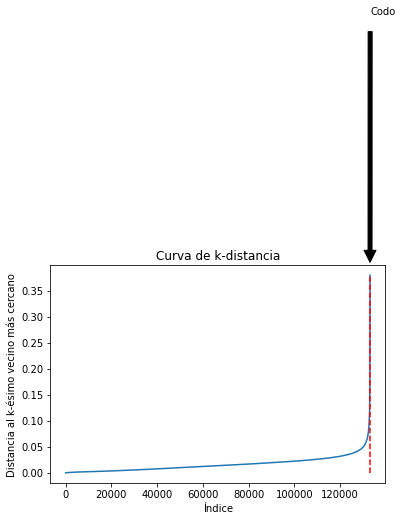

In [15]:
from sklearn.neighbors import NearestNeighbors

# Crear un objeto para encontrar los k vecinos más cercanos
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_pca)

# Calcular las distancias y los índices de los k vecinos más cercanos para cada punto
distances, indices = nbrs.kneighbors(X_pca)

# Ordenar las distancias de forma ascendente
distances = np.sort(distances, axis=0)

# Calcular la curva de k-distancia
k_distances = distances[:, k-1]

# Ordenar las distancias de forma descendente
distances = distances[:, ::-1]

# Calcular las distancias de los k vecinos más cercanos en orden descendente
kth_distances = distances[:, k-1]

# Calcular el índice de la curva de k-distancia
x = np.arange(len(k_distances))
idxs = np.argsort(k_distances)
sorted_distances = k_distances[idxs]
sorted_distances_idxs = x[idxs]

# Encontrar la posición del "codo" en la curva de k-distancia
deltas = np.diff(sorted_distances)
deltas2 = np.diff(deltas)
idx = np.argmax(deltas2) + 2

# Establecer min_samples en el valor encontrado
min_samples = sorted_distances_idxs[idx]

# Crear un gráfico de la curva de k-distancia
fig, ax = plt.subplots()
ax.plot(x, k_distances)
ax.set_title("Curva de k-distancia")
ax.set_xlabel("Índice")
ax.set_ylabel("Distancia al k-ésimo vecino más cercano")
ax.plot([min_samples, min_samples], [0, k_distances[min_samples]], 'r--')
ax.annotate('Codo', xy=(min_samples, k_distances[min_samples]), xytext=(min_samples+50, k_distances[min_samples]+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


In [22]:
# Definir el modelo DBSCAN con los parámetros eps y min_samples
# eps: radio máximo de la vecindad de un punto (distancia euclidiana)
# min_samples: número mínimo de puntos que deben estar dentro del radio eps
dbscan = DBSCAN(eps=0.15, min_samples=1)

In [23]:
# Entrenar el modelo con los datos normalizados y reducidos con PCA
dbscan.fit(X_pca)

DBSCAN(eps=0.15, min_samples=1)

In [24]:
# Obtener los grupos de puntos y etiquetas de cada punto, -1 indica ruido
labels = dbscan.labels_
clusters = set(labels)

In [25]:
# Definir los puntos núcleo (core samples) y los puntos frontera (boundary samples)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

In [26]:
# Imprimir el número de grupos encontrados y los puntos considerados como ruido
n_clusters = len(clusters) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Número de grupos encontrados: {}'.format(n_clusters))
print('Número de puntos considerados como ruido: {}'.format(n_noise))

Número de grupos encontrados: 26
Número de puntos considerados como ruido: 0


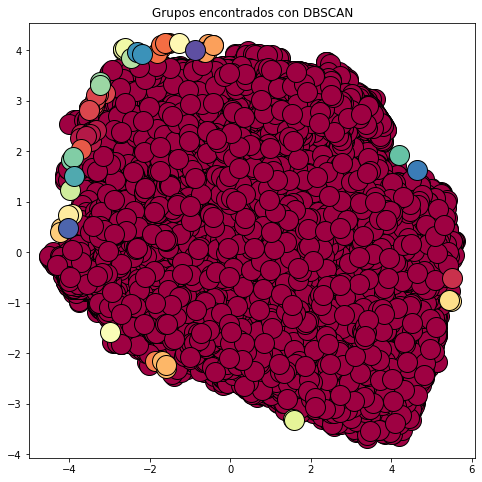

In [27]:
# Visualizar los grupos encontrados
fig, ax = plt.subplots(figsize=(8, 8))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(clusters))]
for k, col in zip(clusters, colors):
    if k == -1:
        col = [0, 0, 0, 1] # negro para los puntos considerados como ruido

    class_member_mask = (labels == k)

    xy = X_pca[class_member_mask & ~core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=10)

    xy = X_pca[class_member_mask & core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=20)

ax.set_title('Grupos encontrados con DBSCAN')
plt.show()
